### Step 1: Import Libraries

In [27]:

import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , confusion_matrix, f1_score

### load the dataset

In [28]:

"""
%pip install imbalanced-learn

"""



'\n%pip install imbalanced-learn\n\n'

In [29]:

from imblearn.over_sampling import RandomOverSampler


In [30]:
data = pd.read_csv('improved_disease_dataset.csv')

data.head()


,fever,headache,nausea,vomiting,fatigue,joint_pain,skin_rash,cough,weight_loss,yellow_eyes,disease
0,1,0,1,0,1,0,0,1,1,0,Paralysis (brain hemorrhage)
1,0,0,1,0,0,0,1,1,0,0,Paralysis (brain hemorrhage)
2,0,0,1,0,1,0,1,1,0,0,Paralysis (brain hemorrhage)
3,0,0,1,1,1,0,1,1,1,1,Paralysis (brain hemorrhage)
4,1,0,1,0,1,0,0,0,1,1,Paralysis (brain hemorrhage)


In [31]:
data.tail()

,fever,headache,nausea,vomiting,fatigue,joint_pain,skin_rash,cough,weight_loss,yellow_eyes,disease
1995,1,1,0,0,1,0,0,0,1,1,Alcoholic hepatitis
1996,1,0,0,0,1,1,1,0,1,1,Alcoholic hepatitis
1997,1,0,0,1,0,0,0,0,0,1,Alcoholic hepatitis
1998,0,0,0,0,1,1,0,0,0,1,Alcoholic hepatitis
1999,0,0,0,1,1,1,0,0,0,1,Alcoholic hepatitis


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   fever        2000 non-null   int64 
 1   headache     2000 non-null   int64 
 2   nausea       2000 non-null   int64 
 3   vomiting     2000 non-null   int64 
 4   fatigue      2000 non-null   int64 
 5   joint_pain   2000 non-null   int64 
 6   skin_rash    2000 non-null   int64 
 7   cough        2000 non-null   int64 
 8   weight_loss  2000 non-null   int64 
 9   yellow_eyes  2000 non-null   int64 
 10  disease      2000 non-null   object
dtypes: int64(10), object(1)
memory usage: 172.0+ KB


In [33]:
encoder = LabelEncoder()
data["disease"] = encoder.fit_transform(data["disease"])

In [34]:
data.head()

,fever,headache,nausea,vomiting,fatigue,joint_pain,skin_rash,cough,weight_loss,yellow_eyes,disease
0,1,0,1,0,1,0,0,1,1,0,29
1,0,0,1,0,0,0,1,1,0,0,29
2,0,0,1,0,1,0,1,1,0,0,29
3,0,0,1,1,1,0,1,1,1,1,29
4,1,0,1,0,1,0,0,0,1,1,29


In [35]:
data.tail(12)

,fever,headache,nausea,vomiting,fatigue,joint_pain,skin_rash,cough,weight_loss,yellow_eyes,disease
1988,0,1,1,1,0,1,0,1,1,0,0
1989,1,1,1,0,1,1,0,1,0,0,0
1990,1,1,0,1,1,1,0,0,0,1,2
1991,1,0,0,0,0,0,0,0,0,1,2
1992,1,0,0,0,1,0,1,0,0,1,2
1993,1,0,1,0,0,0,0,0,0,1,2
1994,1,0,0,0,1,0,0,0,0,1,2
1995,1,1,0,0,1,0,0,0,1,1,2
1996,1,0,0,0,1,1,1,0,1,1,2
1997,1,0,0,1,0,0,0,0,0,1,2


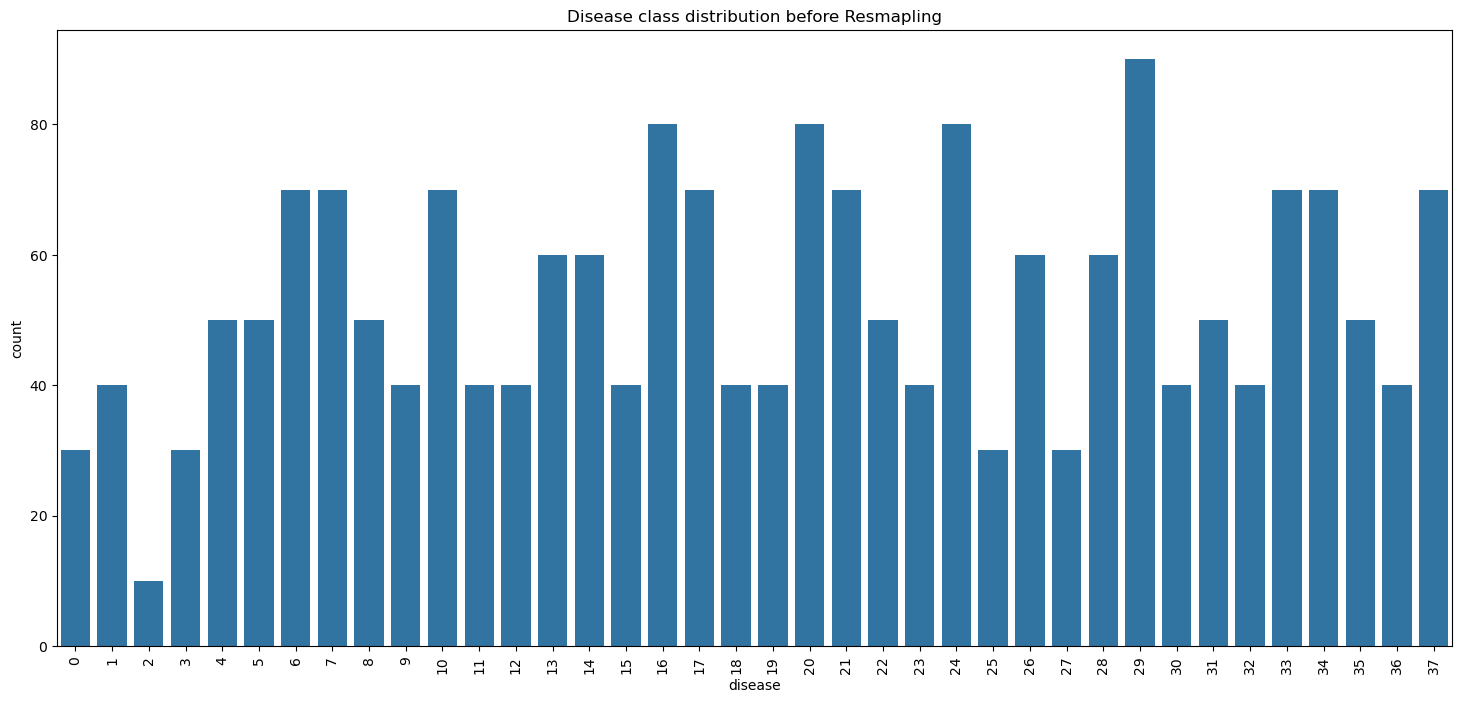

In [36]:


X = data.iloc[:, :-1]
y = data.iloc[:, -1]

plt.figure(figsize=(18,8))
sns.countplot(x=y)
plt.title("Disease class distribution before Resmapling")
plt.xticks(rotation= 90)
plt.show()






In [37]:
ros = RandomOverSampler(random_state = 42)

X_resampled , y_resampled = ros.fit_resample(X,y)

print("Resampled class Distribution : \n", pd.Series(y_resampled).value_counts())

Resampled class Distribution : 
 disease
29    90
11    90
4     90
18    90
23    90
1     90
12    90
30    90
32    90
9     90
20    90
36    90
15    90
19    90
27    90
3     90
25    90
0     90
5     90
22    90
35    90
31    90
16    90
24    90
7     90
17    90
34    90
10    90
37    90
6     90
33    90
21    90
26    90
13    90
28    90
14    90
8     90
2     90
Name: count, dtype: int64


### Step 3: Cross-Validation with Stratified K-Fold

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold


In [39]:

if 'gender' in X_resampled.columns:
    le  = LabelEncoder()
    X_resampled['gender'] = le.fit_transform(X_resampled['gender'])

X_resampled = X_resampled.fillna(0)


if len(y_resampled.shape) > 1:
    y_resampled = y_resampled.values.ravel()

models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "naive bayes": GaussianNB(),
    "Svm": SVC()
}

cv_scoring = 'accuracy' # you can also use 'f1_weighted',
stratified_kfold = StratifiedKFold(n_splits=5 , shuffle = True , random_state=42)


for model_name , model in models.items():
    try:
        scores = cross_val_score(
            model,
            X_resampled,
            y_resampled,
            cv = stratified_kfold,
            scoring = cv_scoring,
            n_jobs = -1,
            error_score = 'raise'

        )
        print("=" * 50)
        print(f"Model: {model_name}")
        print(f"Scores: {scores}")
        print(f"Mean Accuracy: {scores.mean():.4f}")
    except Exception as e:
        print("=" * 50)
        print(f"Model : {model_name} failed with errors: ")
        print(e)


Model: Decision Tree
Scores: [0.5497076  0.54385965 0.53508772 0.53654971 0.52923977]
Mean Accuracy: 0.5389
Model: Random Forest
Scores: [0.55116959 0.5380117  0.54385965 0.54678363 0.5380117 ]
Mean Accuracy: 0.5436
Model: naive bayes
Scores: [0.36403509 0.17982456 0.3625731  0.33479532 0.37134503]
Mean Accuracy: 0.3225
Model: Svm
Scores: [0.51315789 0.51169591 0.49707602 0.48245614 0.49561404]
Mean Accuracy: 0.5000


### Step4: Training Individual Models and Generating Confusion Matrices

Accuracy: 0.489766081871345


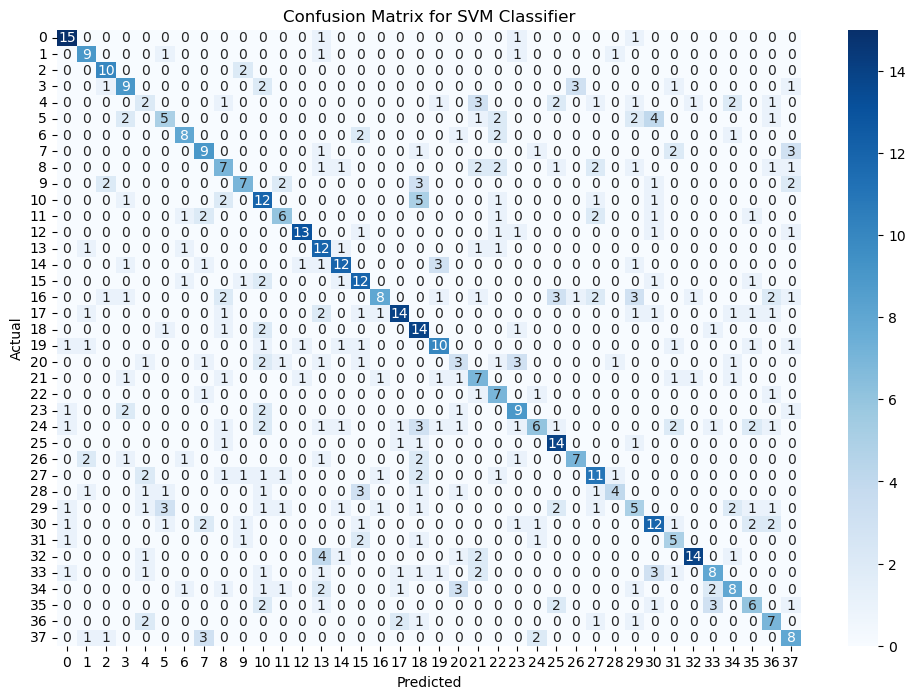

SVM Accuracy: 48.98%
SVM F1 Score: 0.4834


In [40]:

# svc

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)

# Now evaluate on the test set
print("Accuracy:", accuracy_score(y_test, svm_preds))


# 4. Confusion matrix
cf_matrix_svm = confusion_matrix(y_test, svm_preds)

# 5. Plot confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix_svm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for SVM Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 6. Print evaluation metrics
print(f"SVM Accuracy: {accuracy_score(y_test, svm_preds) * 100:.2f}%")
print(f"SVM F1 Score: {f1_score(y_test, svm_preds, average='weighted'):.4f}")


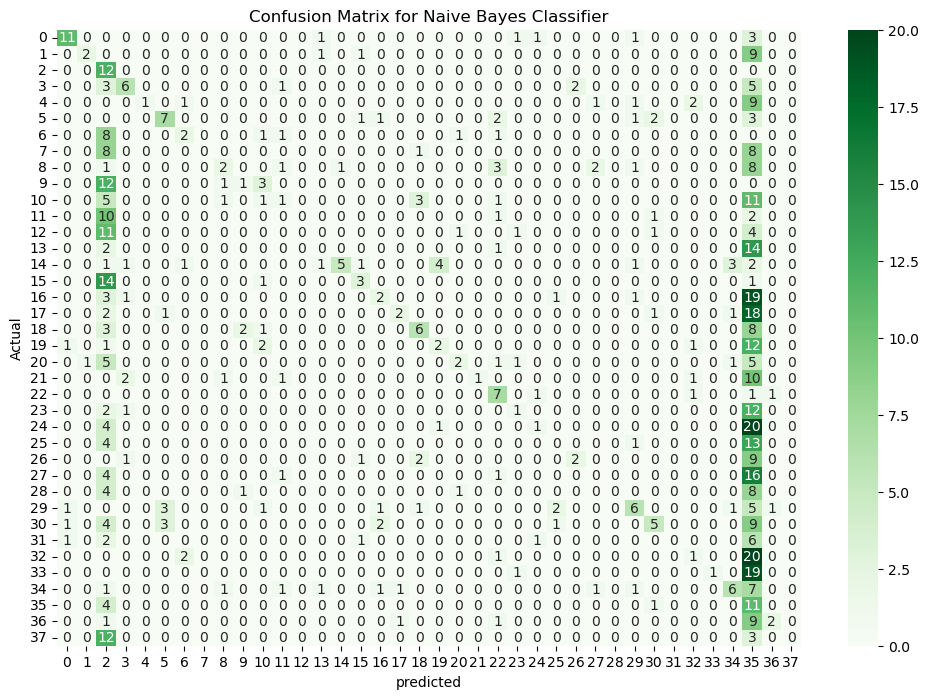

Naive Bayes Accuracy: 16.23%
Naive Bayes F1 Score: 0.1713


In [41]:
# naive bayes



#  train naive bayes
nb_model = GaussianNB()
nb_model.fit(X_train , y_train)

# make predictions on test set
nb_preds = nb_model.predict(X_test)

#confusion matrix
cf_matrix_nb = confusion_matrix(y_test , nb_preds)

# plot confusion matrix
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix_nb , annot = True , fmt ="d", cmap="Greens")
plt.title("Confusion Matrix for Naive Bayes Classifier")
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.show()

# print evaluation metrices
print(f"Naive Bayes Accuracy: {accuracy_score(y_test , nb_preds)* 100:.2f}%")
print(f"Naive Bayes F1 Score: {f1_score(y_test , nb_preds,average= 'weighted'):.4f}")




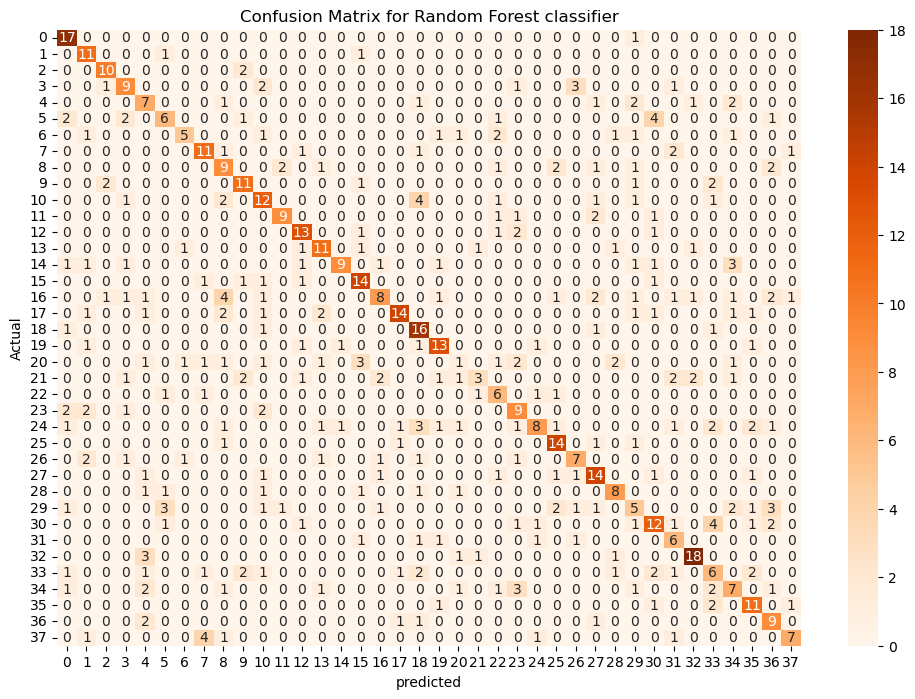

Random forest Accuracy: 53.51%
Random Forest F1 score: 0.5239


In [42]:
# Random forest classifier


# train the random forest
rf_model = RandomForestClassifier(random_state = 42)
rf_model.fit(X_train , y_train)

# make predictions on the test set
rf_preds = rf_model.predict(X_test)

#confusion matrix
cf_matrix_rf = confusion_matrix(y_test , rf_preds)

# plot confusion matrix
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix_rf,annot = True , fmt="d", cmap= "Oranges")
plt.title("Confusion Matrix for Random Forest classifier")
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.show()

# print evaluation metrices
print(f"Random forest Accuracy: {accuracy_score(y_test , rf_preds )* 100:.2f}%")
print(f"Random Forest F1 score: {f1_score(y_test , rf_preds , average='weighted'):.4f}")


### Step 5: Combining Predictions for Robustness

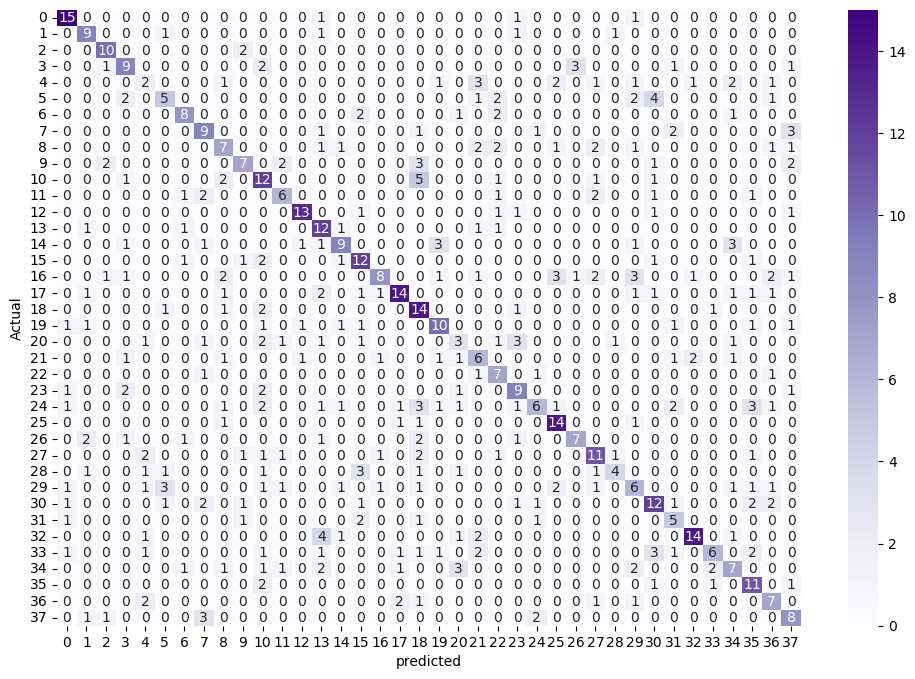

Combined Model Accuracy: 48.83%
Combined Model F1 Score: 0.4810


In [43]:

from statistics import mode

# combine predictions from each model using majority voting
final_preds = [
    mode([i ,j,k]) for i, j ,k in zip(svm_preds , nb_preds , rf_preds)
]

# confusion matrix for combined model
cf_matrix_combined = confusion_matrix(y_test , final_preds)

# plot confusion matrix
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix_combined, annot = True , fmt="d", cmap = "Purples")
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.show()

# print evaluation metrices
print(f"Combined Model Accuracy: {accuracy_score(y_test, final_preds) * 100:.2f}%")
print(f"Combined Model F1 Score: {f1_score(y_test, final_preds, average='weighted'):.4f}")

### Step 6: Creating Prediction Function

In [ ]:


# Get all symptom names
symptoms = X.columns.values
symptom_index = {symptom: idx for idx, symptom in enumerate(symptoms)}

# Prediction function
def predict_disease(input_symptoms):
    # Step 1: Split the comma-separated string and clean it
    input_symptoms = [sym.strip() for sym in input_symptoms.split(",")]

    # Step 2: Create binary input vector
    input_data = [0] * len(symptom_index)
    for symptom in input_symptoms:
        if symptom in symptom_index:
            input_data[symptom_index[symptom]] = 1
        else:
            print(f" Warning: Symptom '{symptom}' not recognized and will be ignored.")

    # Step 3: Convert to DataFrame with correct feature names
    input_df = pd.DataFrame([input_data], columns=symptom_index.keys())

    # Step 4: Make predictions
    rf_pred = encoder.classes_[rf_model.predict(input_df)[0]]
    nb_pred = encoder.classes_[nb_model.predict(input_df)[0]]
    svm_pred = encoder.classes_[svm_model.predict(input_df)[0]]

    # Step 5: Combine predictions using majority vote
    final_pred = mode([rf_pred, nb_pred, svm_pred])

    # Step 6: Return all predictions
    return {
        "Random Forest Prediction": rf_pred,
        "Naive Bayes Prediction": nb_pred,
        "SVM Prediction": svm_pred,
        "Final Prediction (Majority Vote)": final_pred
    }

#  Example usage

print(predict_disease("fever, headache, skin_rash"))



{'Random Forest Prediction': 'Tuberculosis', 'Naive Bayes Prediction': 'Urinary tract infection', 'SVM Prediction': 'Peptic ulcer disease', 'Final Prediction (Majority Vote)': 'Tuberculosis'}


In [45]:
print(X.columns)


Index(['fever', 'headache', 'nausea', 'vomiting', 'fatigue', 'joint_pain',
       'skin_rash', 'cough', 'weight_loss', 'yellow_eyes'],
      dtype='object')
